In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.interpolate as interpolate

In [66]:
m1 = np.genfromtxt("./decay_guy_100.dat")
m2 = np.genfromtxt("./decay_guy_200.dat")

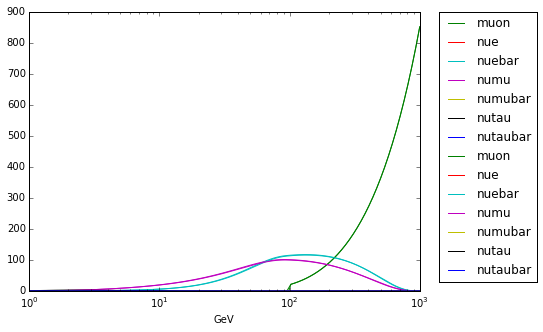

In [67]:
plt.figure(figsize=(7,5))

Es=np.logspace(4,6,50)
Surv=np.exp(-1000000/(2.2e-6*(Es/105.)*3e8))
plt.plot(Es*1e-3,Surv, ls = "dashed")

m = m1

plt.plot(m[:,0],m[:,1]*m[:,0], label = "muon")

plt.plot(m[:,0],m[:,3]*m[:,0], label = "nue")
plt.plot(m[:,0],m[:,4]*m[:,0], label = "nuebar")

plt.plot(m[:,0],m[:,5]*m[:,0], label = "numu")
plt.plot(m[:,0],m[:,6]*m[:,0], label = "numubar")

plt.plot(m[:,0],m[:,7]*m[:,0], label = "nutau")
plt.plot(m[:,0],m[:,8]*m[:,0], label = "nutaubar")

m = m2

plt.plot(m[:,0],m[:,1]*m[:,0], label = "muon")

plt.plot(m[:,0],m[:,3]*m[:,0], label = "nue")
plt.plot(m[:,0],m[:,4]*m[:,0], label = "nuebar")

plt.plot(m[:,0],m[:,5]*m[:,0], label = "numu")
plt.plot(m[:,0],m[:,6]*m[:,0], label = "numubar")

plt.plot(m[:,0],m[:,7]*m[:,0], label = "nutau")
plt.plot(m[:,0],m[:,8]*m[:,0], label = "nutaubar")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.semilogx()
plt.xlabel("GeV")

In [54]:
def Integral(m,i):
    return sum(((m[1:,i]+m[:-1,i])/2.)*(m[1:,0]-m[:-1,0]))

In [55]:
def SIntegral(m,i):
    return integrate.quad(interpolate.interp1d(m[:,0],m[:,i]),m[:,0][0],m[:,0][-1])[0]

In [68]:
SIntegral(m1,1),SIntegral(m2,1)

(620.2633636437068, 620.0084303605321)

In [56]:
900-SIntegral(m,1)

279.9915696394679

In [57]:
MuonLoss=900-Integral(m,1)
print MuonLoss

279.992373077


In [58]:
NueGain=Integral(m,3)
print NueGain
NuebarGain=Integral(m,4)
print NuebarGain

NumuGain=Integral(m,5)
print NumuGain
NumubarGain=Integral(m,6)
print NumubarGain

NutauGain=Integral(m,7)
print NutauGain
NutaubarGain=Integral(m,8)
print NutaubarGain

0.203784026476
281.552814751
275.193435105
0.0401811371222
4.33563196331
0.0360701858123


In [59]:
NueGain + NumuGain + NutauGain

279.73285109487148

In [60]:
NuebarGain + NumubarGain + NutaubarGain

281.6290660740454